In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the data
df=pd.read_excel("../data/Week1_challenge_data_source.xlsx")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
#make a deep copy to work on
df_exp = df.copy(deep=True)
df_exp.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Experience Analytics
#### Traking and evaluation of customers' experience can help organizations to optimize products and services.
#### Here, user experience is related to network parameter performances and the customers' device characteristics.
#### From our dataset, the following are used to conduct a deep user experience analysis.
* TCP retransmission,
* RTT, 
* Average throughput, and 
* handset type


In [6]:
df_exp = df_exp[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]

In [7]:
df_exp.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.0,5.0,NaN,NaN,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.0,5.0,NaN,NaN,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6.0,9.0
3,3.375034e+10,undefined,NaN,NaN,NaN,NaN,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,NaN,NaN,NaN,NaN,6.0,9.0


### Missing values

In [8]:
# missing colum names and there count
df_exp.isnull().sum(axis=0)

MSISDN/Number                   1066
Handset Type                     572
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [9]:
# Filling the missing values using Mean

#RTT null values fill with mean
df_exp['Avg RTT DL (ms)'].fillna(value=df_exp['Avg RTT DL (ms)'].mean(), inplace=True)
df_exp['Avg RTT UL (ms)'].fillna(value=df_exp['Avg RTT UL (ms)'].mean(), inplace=True)

# TCP retransmission null values fill with mean
df_exp['TCP DL Retrans. Vol (Bytes)'].fillna(value=df_exp['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
df_exp['TCP UL Retrans. Vol (Bytes)'].fillna(value=df_exp['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)

# Avg Bearer TP null values filled with mean
df_exp['Avg Bearer TP DL (kbps)'].fillna(value=df_exp['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df_exp['Avg Bearer TP UL (kbps)'].fillna(value=df_exp['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

# Catagorical variabels null values filled with mode
df_exp['Handset Type'].fillna(value=df_exp['Handset Type'].mode().iloc[0], inplace=True)
df_exp['MSISDN/Number'].fillna(value=df_exp['MSISDN/Number'].mode().iloc[0], inplace=True)


# now look at missing values after filling
df_exp.isnull().sum(axis=0)



MSISDN/Number                  0
Handset Type                   0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

### Outliers

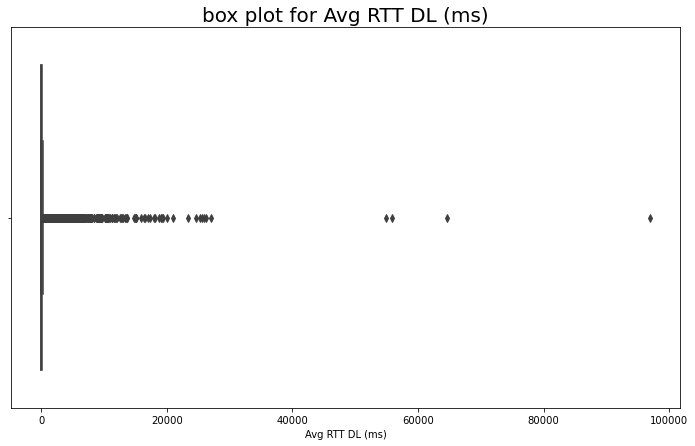

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg RTT DL (ms)')
plt.title("box plot for Avg RTT DL (ms)", size=20)
plt.show()

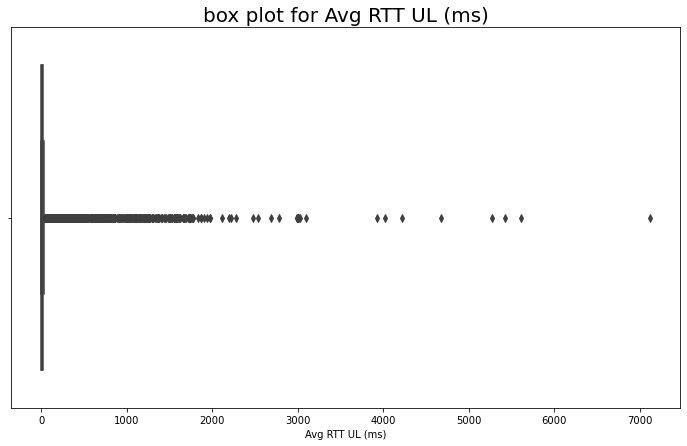

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg RTT UL (ms)')
plt.title("box plot for Avg RTT UL (ms)", size=20)
plt.show()

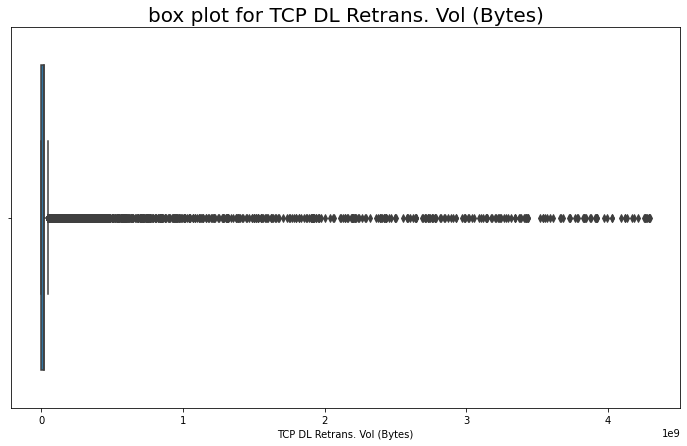

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='TCP DL Retrans. Vol (Bytes)')
plt.title("box plot for TCP DL Retrans. Vol (Bytes)", size=20)
plt.show()

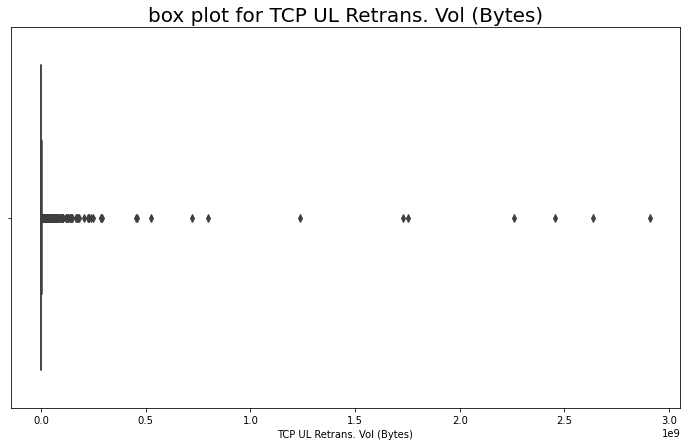

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='TCP UL Retrans. Vol (Bytes)')
plt.title("box plot for TCP UL Retrans. Vol (Bytes)", size=20)
plt.show()

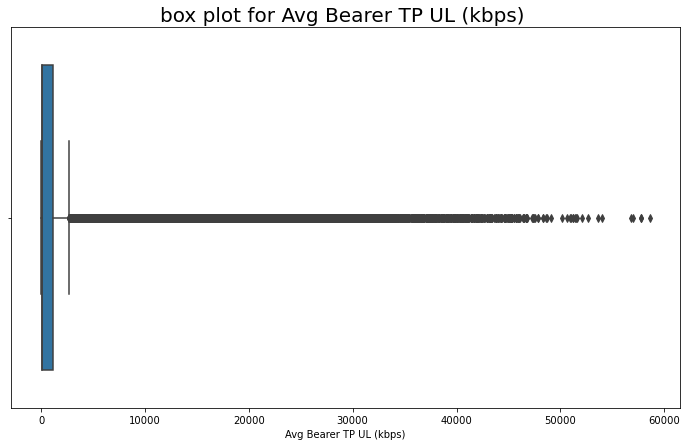

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg Bearer TP UL (kbps)')
plt.title("box plot for Avg Bearer TP UL (kbps) ", size=20)
plt.show()

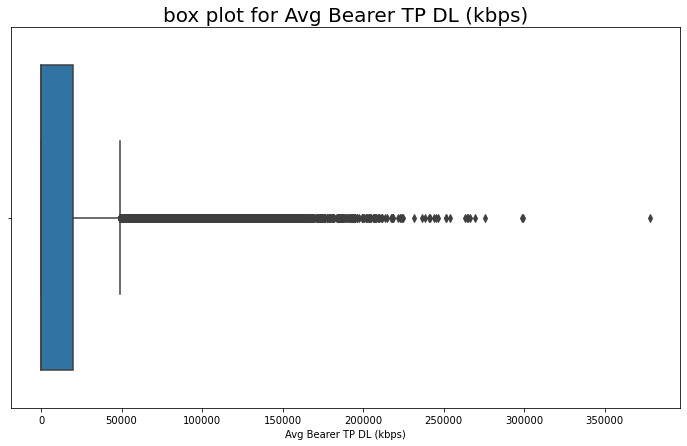

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg Bearer TP DL (kbps)')
plt.title("box plot for Avg Bearer TP DL (kbps)", size=20)
plt.show()

#### Fill the outliers

In [18]:
#Printing the median and percentile of Avg RTT DL (ms)
df_exp['Avg RTT DL (ms)'].describe()

count    150001.000000
mean        109.795706
std         559.342620
min           0.000000
25%          35.000000
50%          54.000000
75%         109.795706
max       96923.000000
Name: Avg RTT DL (ms), dtype: float64

In [19]:
#Replacing outliers with median
# max = 96,923
# median = 54
# Fix or replace 90%(quantile)
#Replacing outliers with median
df_exp['Avg RTT DL (ms)'] = np.where(df_exp['Avg RTT DL (ms)'] > 220, 54, df_exp['Avg RTT DL (ms)'])

In [22]:
#after fixing outliers, distribution
df_exp['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.169484
std          37.817597
min           0.000000
25%          35.000000
50%          54.000000
75%         104.000000
max         220.000000
Name: Avg RTT DL (ms), dtype: float64

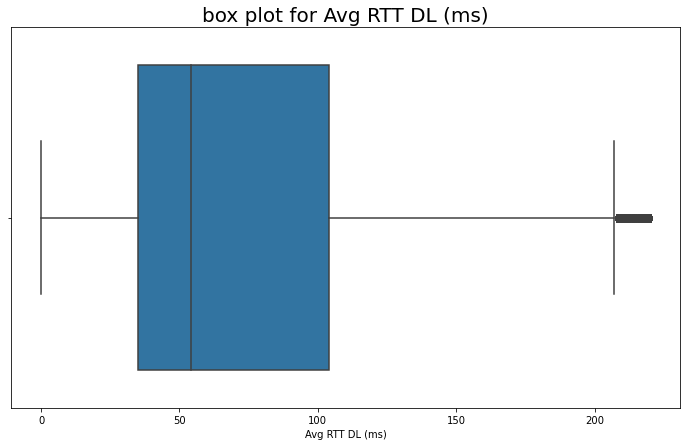

In [23]:
#box plot after fixing outliers
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg RTT DL (ms)')
plt.title("box plot for Avg RTT DL (ms)", size=20)
plt.show()

In [25]:
#Similarily for all parameters

df_exp['Avg RTT UL (ms)'].describe()

count    150001.000000
mean         17.662883
std          76.529933
min           0.000000
25%           3.000000
50%           7.000000
75%          17.662883
max        7120.000000
Name: Avg RTT UL (ms), dtype: float64

In [26]:
#Replacing outliers with median
# max = 7120
# median = 7
# Fix or replace 90%(quantile)
#Replacing outliers with median
df_exp['Avg RTT UL (ms)'] = np.where(df_exp['Avg RTT UL (ms)'] > 40, 7, df_exp['Avg RTT UL (ms)'])

In [27]:
#Printing the median and percentile of TCP DL Retrans. Vol (Bytes)
df_exp['TCP DL Retrans. Vol (Bytes)'].describe()

count    1.500010e+05
mean     2.080991e+07
std      1.172356e+08
min      2.000000e+00
25%      1.332932e+06
50%      2.080991e+07
75%      2.080991e+07
max      4.294426e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

In [28]:
# Replacing outliers with median
# max = 4.294426e+09
# median = 2.080991e+07
# Fix or replace 90%(quantile)
#Replacing outliers with median
df_exp['TCP DL Retrans. Vol (Bytes)'] = np.where(df_exp['TCP DL Retrans. Vol (Bytes)'] > 20809914.27034193, 20809914.27034193, df_exp['TCP DL Retrans. Vol (Bytes)'])

In [29]:
#Printing the median and percentile of TCP UL Retrans. Vol (Bytes)
df_exp['TCP UL Retrans. Vol (Bytes)'].describe()

count    1.500010e+05
mean     7.596587e+05
std      1.577616e+07
min      1.000000e+00
25%      6.300900e+04
50%      7.596587e+05
75%      7.596587e+05
max      2.908226e+09
Name: TCP UL Retrans. Vol (Bytes), dtype: float64

In [30]:
# Replacing outliers with median
# max = 2.908226e+09
# median = 7.596587e+05
# Fix or replace 90%(quantile)
df_exp['TCP UL Retrans. Vol (Bytes)'] = np.where(df_exp['TCP UL Retrans. Vol (Bytes)'] > 759658.6648110661, 759658.6648110661, df_exp['TCP UL Retrans. Vol (Bytes)'])

In [31]:
#distribution after fixing
df_exp.describe()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,150001.000000,150001.000000
mean,4.182414e+10,64.169484,10.159280,1.375607e+07,525524.011857,13300.045927,1770.428647
std,2.438731e+12,37.817597,8.716573,9.343134e+06,335154.724475,23971.798635,4625.340082
min,3.360100e+10,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000
25%,3.365094e+10,35.000000,3.000000,1.332932e+06,63009.000000,43.000000,47.000000
50%,3.366361e+10,54.000000,7.000000,2.080991e+07,759658.664811,63.000000,63.000000
75%,3.368307e+10,104.000000,17.662883,2.080991e+07,759658.664811,19710.000000,1120.000000
max,8.823971e+14,220.000000,40.000000,2.080991e+07,759658.664811,378160.000000,58613.000000


## Aggregating total value

In [32]:
# Aggregating Total value of Avg RTT UL + DL
df_exp['Average RTT'] = df_exp['Avg RTT UL (ms)']+df_exp['Avg RTT DL (ms)']

# Aggreagating Total value of TCP DL + UL
df_exp['Average TCP']=df_exp['TCP DL Retrans. Vol (Bytes)']+df_exp['TCP UL Retrans. Vol (Bytes)']

# Aggregating Total values of Avg throughput
df_exp['Average throughput']=df_exp['Avg Bearer TP DL (kbps)']+df_exp['Avg Bearer TP DL (kbps)']

# show aggregated dataframe
df_exp.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Average RTT,Average TCP,Average throughput
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,47.000000,2.156957e+07,46.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,70.000000,2.156957e+07,32.0
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,2.156957e+07,12.0
3,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,127.458589,2.156957e+07,88.0
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,2.156957e+07,12.0


In [33]:
df_expNew = df_exp[['MSISDN/Number','Handset Type','Average RTT',
                   'Average TCP','Average throughput']]
df_expNew.head()

,MSISDN/Number,Handset Type,Average RTT,Average TCP,Average throughput
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.000000,2.156957e+07,46.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.000000,2.156957e+07,32.0
2,3.376063e+10,Samsung Galaxy A8 (2018),127.458589,2.156957e+07,12.0
3,3.375034e+10,undefined,127.458589,2.156957e+07,88.0
4,3.369980e+10,Samsung Sm-G390F,127.458589,2.156957e+07,12.0


# ---------------------------------------------------------------------------------------------------------------
## Compute and list 10 of the top, bottom and most frequent TCP, RTT, and Throughput values in the dataset

# 1. TCP Values

In [34]:
#sorting data highest to lowest
df_expNew.sort_values(by=['Average TCP'],ascending=False, inplace=True)

In [38]:
#getting the top 10 TCP values and saving to csv file
top10tcp=df_expNew['Average TCP'].head(10)
top10tcp.to_csv("../data/top10tcp.csv",index=False)
top10tcp.to_frame()

,Average TCP
0,2.156957e+07
87119,2.156957e+07
87141,2.156957e+07
87140,2.156957e+07
87138,2.156957e+07
87137,2.156957e+07
87136,2.156957e+07
87135,2.156957e+07
87134,2.156957e+07
87133,2.156957e+07


In [36]:
#getting the bottom 10 TCP values and saving to csv file
btm10tcp=df_expNew['Average TCP'].tail(10)
btm10tcp.to_csv("../data/btm10tcp.csv",index=False)
btm10tcp.to_frame()

,Average TCP
12849,143.0
83214,134.0
95955,134.0
99947,129.0
8794,128.0
97061,113.0
13142,108.0
18417,106.0
111100,97.0
143594,86.0


In [39]:
#getting the most frequent TCP values and saving to a csv file
most_freq = df_expNew['Average TCP'].value_counts().index.tolist()
# changing the list to a datafrmae
df1 = pd.DataFrame(most_freq)
# saving to a csv file
most_freq10=df1.head(10)
most_freq10.to_csv("../data/most_freqTCP.csv",index=False)
most_freq10

,0
0,2.156957e+07
1,2.081121e+07
2,2.081124e+07
3,7.609887e+05
4,2.081123e+07
5,7.596967e+05
6,7.597507e+05
7,7.623187e+05
8,2.081257e+07
9,7.609767e+05


# 2. RTT Values

In [40]:
#sorting data highest to lowest
df_expNew.sort_values(by=['Average RTT'],ascending=False, inplace=True)

In [41]:
#getting the top 10 rtt values and saving to csv
top10rtt=df_expNew['Average RTT'].head(10)
top10rtt.to_csv("../data/top10rtt.csv",index=False)
top10rtt.to_frame()

,Average RTT
141222,259.0
120437,259.0
117828,258.0
117962,258.0
68300,258.0
764,256.0
65745,255.0
66074,255.0
36850,255.0
60428,255.0


In [42]:
#getting the bottom 10 RTT values and saving to csv file
btm10rtt=df_expNew['Average RTT'].tail(10)
btm10rtt.to_csv("../data/btm10rtt.csv",index=False)
btm10rtt.to_frame()

,Average RTT
8756,6.0
123210,6.0
103544,5.0
50966,4.0
144923,4.0
71738,2.0
42602,0.0
143878,0.0
103321,0.0
124538,0.0


In [43]:
#getting the most frequent RTT values
most_freq = df_expNew['Average RTT'].value_counts().index.tolist()
# changing the list to a datafrmae
df1 = pd.DataFrame(most_freq)
# saving to a csv file
most_freq10=df1.head(10)
most_freq10.to_csv("../data/most_freqRTT.csv",index=False)
most_freq10

,0
0,127.458589
1,29.000000
2,39.000000
3,38.000000
4,40.000000
5,30.000000
6,28.000000
7,61.000000
8,59.000000
9,49.000000


# 3. Average throughput values

In [44]:
#sorting data highest to lowest
df_expNew.sort_values(by=['Average throughput'], ascending=False, inplace=True)

In [45]:
#getting the top 10 avg throughput values and saving to csv
top10avgT=df_expNew['Average throughput'].head(10)
top10avgT.to_csv("../data/top10avgThroughput.csv",index=False)
top10avgT.to_frame()

,Average throughput
120876,756320.0
141250,598514.0
143670,598004.0
149616,552080.0
92177,538724.0
117776,532664.0
115836,530880.0
89567,528896.0
116550,526094.0
41551,508506.0


In [46]:
#getting the bottom 10 avg thr values and saving to csv file
btm10rtt=df_expNew['Average throughput'].tail(10)
btm10rtt.to_csv("../data/btm10avgThroughput.csv",index=False)
btm10rtt.to_frame()

,Average throughput
67293,0.0
36282,0.0
21988,0.0
49389,0.0
125213,0.0
135289,0.0
17545,0.0
82575,0.0
82423,0.0
59643,0.0


In [47]:
#getting the most frequent avf thr values
most_freq = df_expNew['Average throughput'].value_counts().index.tolist()
# changing the list to a datafrmae
df1 = pd.DataFrame(most_freq)
# saving to a csv file
most_freq10=df1.head(10)
most_freq10.to_csv("../data/most_freqAvgThr.csv",index=False)
most_freq10

,0
0,46.0
1,86.0
2,88.0
3,12.0
4,44.0
5,96.0
6,126.0
7,84.0
8,90.0
9,94.0


# --------------------------------------------------------------------------------------------------------------
# Distribution of the average throughput per handset type
# --------------------------------------------------------------------------------------------------------------

In [48]:
# average throughput for each Handset type
Average_thr = df_expNew.groupby('Handset Type')['Average throughput'].sum()
avg_thr=Average_thr.to_frame().head(10)
avg_thr.reset_index()

,Handset Type,Average throughput
0,A-Link Telecom I. Cubot A5,46368.0
1,A-Link Telecom I. Cubot Note Plus,13054.0
2,A-Link Telecom I. Cubot Note S,17030.0
3,A-Link Telecom I. Cubot Nova,111334.0
4,A-Link Telecom I. Cubot Power,138252.0
5,A-Link Telecom I. Cubot R9,5724.0
6,A-Link Telecom I. Cubot X18 Plus,48432.0
7,Acer Liquid M220,0.0
8,Acer Liquid Z220,776.0
9,Acer Liquid Z530,442.0


# Throughput is an actual measure of how much data is successfully transferred from source to destination. So we can infer that the following three handsets have the best quality wifi adapters.
### ------------------------------------------------------------------------------------------------------------------------------------------------------------
* 1. A-Link Telecom I. Cubot A5
* 2. A-Link Telecom I. Cubot Note Plus
* 3. A-Link Telecom I. Cubot Note S

### -------------------------------------------------------------------------------------------------------------------------------------------------------------


# The average TCP retransmission view per handset type


In [49]:
# average tcp retransmission for each Handset type
Average_thr = df_expNew.groupby('Handset Type')['Average TCP'].sum()
avg_thr=Average_thr.to_frame().head(10)
avg_thr.reset_index()

,Handset Type,Average TCP
0,A-Link Telecom I. Cubot A5,2.156957e+07
1,A-Link Telecom I. Cubot Note Plus,6.162130e+05
2,A-Link Telecom I. Cubot Note S,2.087717e+07
3,A-Link Telecom I. Cubot Nova,1.371700e+05
4,A-Link Telecom I. Cubot Power,8.041000e+03
5,A-Link Telecom I. Cubot R9,3.099900e+04
6,A-Link Telecom I. Cubot X18 Plus,3.451810e+06
7,Acer Liquid M220,2.156957e+07
8,Acer Liquid Z220,1.743870e+05
9,Acer Liquid Z530,8.981307e+05


# From this, we can infer that the following three phones deploy the best TCP retransmission mechanism, which inturn means that end-to-end data transfer is least lost in this handsets.
### ------------------------------------------------------------------------------------------------------------------------------------------------------------
* 1. A-Link Telecom I. Cubot A5
* 2. A-Link Telecom I. Cubot Note Plus
* 3. A-Link Telecom I. Cubot Note S

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### So Average throughput and TCP retransmission mechanism are highly related.

# ==>K-means

## Standardize data
### *This is done to make the columns ready for clustering and the different results were saved to csv files. This files are later used to analyze user satisfaction.

In [50]:
standardized_df = pd.DataFrame(df_expNew['Average TCP'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df_expNew['Average TCP'] = std_data

In [51]:
standardized_df = pd.DataFrame(df_expNew['Average throughput'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df_expNew['Average throughput'] = std_data

In [52]:
standardized_df = pd.DataFrame(df_expNew['Average RTT'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df_expNew['Average RTT'] = std_data

In [57]:
df_expNew2 = df_expNew[['MSISDN/Number', 'Average TCP', 'Average throughput', 'Average RTT']]


In [58]:
df_expNew2.head()

,MSISDN/Number,Average TCP,Average throughput,Average RTT
120876,3.366117e+10,-1.357519,15.220434,0.510533
141250,3.369817e+10,0.711986,11.928930,-0.596697
143670,3.367251e+10,-1.480467,11.918292,-0.714487
149616,3.365169e+10,-1.396600,10.960414,-0.855836
92177,3.366856e+10,0.692157,10.681835,-0.596697


In [59]:
df_expNew2.index = df_expNew2['MSISDN/Number']
df_expNew2 = df_expNew2.iloc[:,1:4]

In [60]:
df_expNew2.head()

,Average TCP,Average throughput,Average RTT
MSISDN/Number,,,
3.366117e+10,-1.357519,15.220434,0.510533
3.369817e+10,0.711986,11.928930,-0.596697
3.367251e+10,-1.480467,11.918292,-0.714487
3.365169e+10,-1.396600,10.960414,-0.855836
3.366856e+10,0.692157,10.681835,-0.596697


In [61]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_expNew2)
label = kmeans.predict(df_expNew2)

In [62]:
df_kclus = pd.DataFrame(df_expNew2)
df_kclus['clusters'] = label

In [63]:
centroids = kmeans.cluster_centers_

In [64]:
u_labels = np.unique(label)

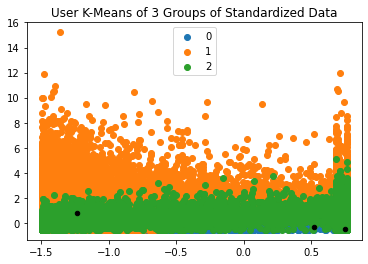

In [65]:
# plot
plt.title('User K-Means of 3 Groups of Standardized Data')
for i in u_labels:
    plt.scatter(df_kclus[label == i].iloc[:,0] , df_kclus[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'black')
plt.legend()
plt.show()

In [66]:
#Now we create a kmeans function and fit it on the data:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_expNew2)

KMeans(n_clusters=3)

In [67]:
# inertia on the fitted data
kmeans.inertia_

162101.54758289858

In [68]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_expNew2)
    SSE.append(kmeans.inertia_)

In [69]:
centroids_df = pd.DataFrame(centroids, columns=['Average RTT','Average TCP','Average throughput'])
centroids_df.to_csv('../data/centro_experience.csv')

In [70]:
df_expNew2.to_csv('../data/std_experience.csv')

Text(0, 0.5, 'Inertia')

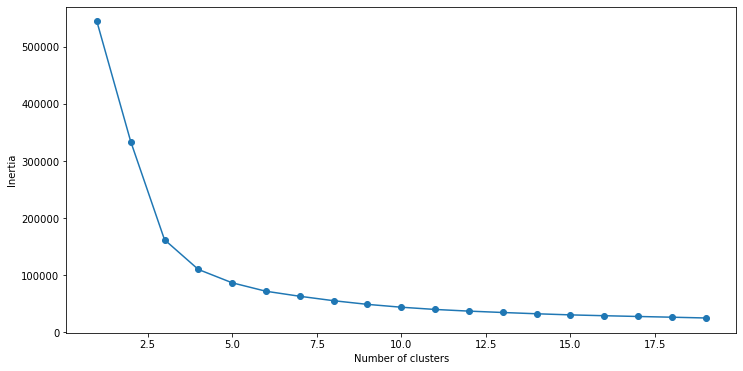

In [71]:
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')